# Phase V
## Joseph Princiotta & Justin Lusk
#### CYBER 363 Fall 2022

## Part A
### Problem Introduction & Statements

The CIO of Billy's Accounting Inc. approached the cybersecurity data team to explore the use of a machine training algorithm to help filter malicious websites from the companies' network. In the past year Billy's Accounting Inc. network had seen a 40% increase in malicious domains accessed on the network; causing the firewall and network team to become overloaded. The network security team's initial approach to halting malicious websites was done manually, with teammembers having to update the firewall's access control lists each week with newly encountered malicious website data. This process was time consuming and is only reactive, the team could only block malicious websites after they had been discovered. 

The CIO tasked the cyber data team with exploring the automating of discovery and blocking of malicious website data on the companies' networks. If implemented properly this would save thousands of man hours and would provide a proactive solution. This would increase the security of the network and increase the speed of discovering malicious websites.

The cyber data team was given a dataset of recent website data which included 37 categories of website data and an identifier if the website was malicious or not. This dataset was used to test and train a suitable ML algorithm to predict risky websites proactivly. 

### Phase 0 & 1 Data Preprocessing and Feature Selection

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Dec 10 19:52:38 2022

@author: jprince
"""

### Phase 0/1 Code.
import scipy.cluster.hierarchy as sch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler


dfTest = pd.read_csv("Phishing_Legitimate_test_student.csv", na_values=['',' ','n/a'])
dfTrain = pd.read_csv("Phishing_Legitimate_train_missing_data.csv", na_values=['',' ','n/a'])
################################# Phase 0 and 1 ####################################################
trainRowsWithNa = dfTrain[ dfTrain.isnull().any(axis=1) ]
rowsToDrop = dfTrain[ dfTrain.isnull().sum(axis=1) > 1 ].index
dfTrain.drop(rowsToDrop, inplace=True)
imputer = KNNImputer(n_neighbors=10)
dfTrain2 = pd.DataFrame(imputer.fit_transform(dfTrain),columns = dfTrain.columns)
rows_to_drop=dfTrain2[dfTrain2['UrlLength']>500].index
dfTrain2.drop(rows_to_drop,inplace=True)
rows_to_drop=dfTrain2[dfTrain2['NumNumericChars']>100].index
dfTrain2.drop(rows_to_drop,inplace=True)
rows_to_drop=dfTrain2[dfTrain2['NumDash']>20].index
dfTrain2.drop(rows_to_drop,inplace=True)
dfTrain2Numerical = dfTrain2[['NumNumericChars','NumDots','SubdomainLevel','PathLevel','UrlLength','NumDash','NumDashInHostname',
          'NumUnderscore','NumPercent','NumQueryComponents','NumAmpersand','NumHash','HostnameLength','PathLength','QueryLength','NumSensitiveWords']]
clf= LocalOutlierFactor(n_neighbors=20)
X=dfTrain2Numerical.to_numpy()
outlier_label=clf.fit_predict(X)
rows_to_drop= dfTrain2.iloc[clf.negative_outlier_factor_ < -1.30].index
dfTrain2.drop(rows_to_drop,inplace=True)
dfTrain2Numerical = dfTrain2[['NumNumericChars','NumDots','SubdomainLevel','PathLevel','UrlLength','NumDash','NumDashInHostname','NumUnderscore','NumPercent','NumQueryComponents','NumAmpersand','NumHash','HostnameLength','PathLength','QueryLength','NumSensitiveWords']]
X = dfTrain2Numerical.to_numpy()
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
dfTrain2Numerical.is_copy = False
dfTrain2Numerical[['NumNumericChars_Standardized','NumDots_Standardized','SubdomainLevel_Standardized','PathLevel_Standardized','UrlLength_Standardized','NumDash_Standardized','NumDashInHostname_Standardized','NumUnderscore_Standardized','NumPercent_Standardized','NumQueryComponents_Standardized','NumAmpersand_Standardized','NumHash_Standardized','HostnameLength_Standardized','PathLength_Standardized','QueryLength_Standardized','NumSensitiveWords_Standardized']]=X

## Phase 3/4 Code.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create dataframe of target 'CLASS_LABEL'
dfClass_labels = pd.DataFrame(dfTrain2['CLASS_LABEL'])

# Create dataframe of standardized numerical features
dfTrain2Numstd= dfTrain2Numerical[['UrlLength_Standardized','NumNumericChars_Standardized','NumDots_Standardized','SubdomainLevel_Standardized','PathLevel_Standardized','NumDash_Standardized','NumDashInHostname_Standardized','NumUnderscore_Standardized','NumPercent_Standardized','NumQueryComponents_Standardized','NumAmpersand_Standardized','NumHash_Standardized','HostnameLength_Standardized','PathLength_Standardized','QueryLength_Standardized','NumSensitiveWords_Standardized']]

# Created dataframe of all binary data, now binary and standardized numerical features can be seperated IF NEEDED.
dfTrain2Bin= dfTrain2[['AtSymbol','TildeSymbol','NoHttps','RandomString','IpAddress','DomainInSubdomains','DomainInPaths','DoubleSlashInPath','EmbeddedBrandName','PctExtResourceUrls','ExtFavicon','InsecureForms','RelativeFormAction','ExtFormAction','RightClickDisabled','PopUpWindow','IframeOrFrame','MissingTitle','ImagesOnlyInForm']]
# dfTrain2Bin contains binary features and dfTrain2Numstd contains standardized numerical data. 

# Create main dataframe that contains standardized numerical data and binary data
dfTrain3=dfTrain2Bin.join(dfTrain2Numstd)
# Create list of all features
featurecols=dfTrain3.columns.to_list()

# Create seperate lists for numerical & binary features lists
NUMfeaturecols=dfTrain2Numstd.columns.to_list()
BINfeaturecols=dfTrain2Bin.columns.to_list()

####### Dataframe list: ######
# 'dfTrain3' = Main dataframe of training data, std numerical and binary data 
# 'featurecols' = list of all feature cols in 'dfTrain3'
# 'NUMfeaturecols' = list of all numerical features 
# 'BINfeaturecols' = list of all binary features
# 'dfTrain2Bin' = all binary features 
# 'dfTrain2Numstd' = all numerical features standardized

# Create dataframe of target 'CLASS_LABEL'
dfClass_labels = pd.DataFrame(dfTrain2['CLASS_LABEL'])
# Add 'dfClass_labels' to main dfTrain3 
dfTrain3 = dfTrain3.join(dfClass_labels)

/var/folders/_4/hwjprh3j6wl6k6dfccg50w0c0000gn/T/ipykernel_10502/3532494461.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTrain2Numerical[['NumNumericChars_Standardized','NumDots_Standardized','SubdomainLevel_Standardized','PathLevel_Standardized','UrlLength_Standardized','NumDash_Standardized','NumDashInHostname_Standardized','NumUnderscore_Standardized','NumPercent_Standardized','NumQueryComponents_Standardized','NumAmpersand_Standardized','NumHash_Standardized','HostnameLength_Standardized','PathLength_Standardized','QueryLength_Standardized','NumSensitiveWords_Standardized']]=X
/var/folders/_4/hwjprh3j6wl6k6dfccg50w0c0000gn/T/ipykernel_10502/3532494461.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

#### Feature Selection based on previous phases.

1. 'NumDash_Standardized'
2. 'PathLength_Standardized'
3. 'UrlLength_Standardized'
4. 'PathLevel_Standardized'
5. 'DomainInPaths'
6. 'RandomString'
7. 'InsecureForms'

## Phase V
Two types of ML models were tested, Random Forest classifier and SVM classification.

##### First steps are to build dataframe of final selected features and perform training/testing data split

In [2]:
# make dataframe features only selected features
dfFeatures=dfTrain3[['NumDash_Standardized','PathLength_Standardized','UrlLength_Standardized','PathLevel_Standardized','DomainInPaths','RandomString','InsecureForms']]
Y=dfTrain3['CLASS_LABEL']
X=dfFeatures

### Random Forest algorithm 
Insert quick desc of random forest

## Justin, we need to insert the optimization for the random forest, I thinkg it's just the max_depth that we have to optimize and the n_estimators. In the course book, in the Random forest section there are examples of this toward the end of the section plotting from the first tree to the 100th. 

0.815327251208572
0.8218299800024487


/Users/jprince/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/jprince/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


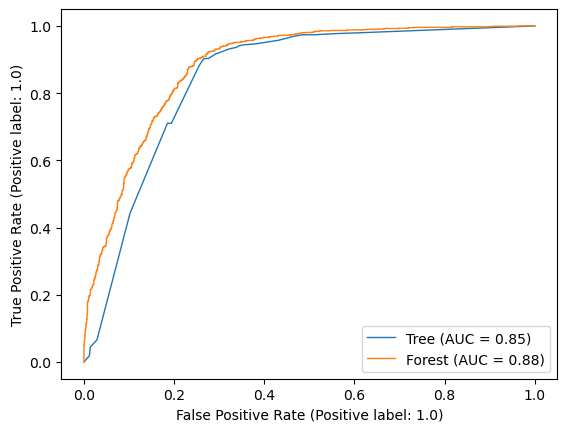

In [3]:
### Fit a std classification tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.50,shuffle=False,random_state=1)
clf = DecisionTreeClassifier(max_depth=6)
clf.fit(X_train, Y_train)
 
Y_test_predicted=clf.predict(X_test)
 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
auc=roc_auc_score(Y_test, Y_test_predicted)
print(auc)
fig, ax = plt.subplots()
plot_roc_curve(clf, X_test, Y_test,name='Tree', lw=1, ax=ax)

# Fit a random forest with 100 trees using 400 random training cases for each tree

from sklearn.ensemble import RandomForestClassifier
rfclf=RandomForestClassifier(n_estimators=100, max_depth=6,random_state=1, max_samples=400)
rfclf.fit(X_train, Y_train)
 
Y_test_predicted=rfclf.predict(X_test)
 
auc=roc_auc_score(Y_test, Y_test_predicted)
print(auc)
plot_roc_curve(rfclf, X_test, Y_test,name='Forest', lw=1, ax=ax)
 
 
plt.show()

#### Results
explain results

## Justin, for the SVM algo we just need to explain the optimization of the kfold - n_estimators. This algo takes a bit to work through everythin, stupid python only uses a single core so it takes about 5min.

### SVM algorithm
insert quick desk of algo

##### Tuning and selecting the best C value for SVM algorithm on data

large C = smaller error line boundries

Smaller c = larger error line boundries

Smaller C means better generalization

Larger C value = beter performance on the training set

We want our model to be able to generalize better so we will tune the algorithm for the smallest C possible keeping F1 robust. 

##### Model testing for SVM algorithm will use gridseach on kfolds
A gridsearch was used to test through 'c' values and kernel types. 


Fitting 10 folds for each of 40 candidates, totalling 400 fits
[CV 1/10] END C=0.1, kernel=poly; f1: (test=0.826) precision: (test=0.751) recall: (test=0.918) roc_auc: (test=0.865) total time=   0.2s
[CV 2/10] END C=0.1, kernel=poly; f1: (test=0.825) precision: (test=0.749) recall: (test=0.919) roc_auc: (test=0.834) total time=   0.2s
[CV 3/10] END C=0.1, kernel=poly; f1: (test=0.805) precision: (test=0.760) recall: (test=0.855) roc_auc: (test=0.837) total time=   0.2s
[CV 4/10] END C=0.1, kernel=poly; f1: (test=0.829) precision: (test=0.756) recall: (test=0.918) roc_auc: (test=0.854) total time=   0.2s
[CV 5/10] END C=0.1, kernel=poly; f1: (test=0.833) precision: (test=0.746) recall: (test=0.944) roc_auc: (test=0.856) total time=   0.2s
[CV 6/10] END C=0.1, kernel=poly; f1: (test=0.839) precision: (test=0.773) recall: (test=0.918) roc_auc: (test=0.889) total time=   0.2s
[CV 7/10] END C=0.1, kernel=poly; f1: (test=0.776) precision: (test=0.696) recall: (test=0.876) roc_auc: (test=0.79

[CV 9/10] END C=11.200000000000001, kernel=rbf; f1: (test=0.842) precision: (test=0.771) recall: (test=0.927) roc_auc: (test=0.900) total time=   0.2s
[CV 10/10] END C=11.200000000000001, kernel=rbf; f1: (test=0.846) precision: (test=0.791) recall: (test=0.910) roc_auc: (test=0.899) total time=   0.2s
[CV 1/10] END C=11.200000000000001, kernel=linear; f1: (test=0.790) precision: (test=0.688) recall: (test=0.927) roc_auc: (test=0.853) total time=   0.5s
[CV 2/10] END C=11.200000000000001, kernel=linear; f1: (test=0.804) precision: (test=0.708) recall: (test=0.932) roc_auc: (test=0.821) total time=   0.5s
[CV 3/10] END C=11.200000000000001, kernel=linear; f1: (test=0.779) precision: (test=0.698) recall: (test=0.880) roc_auc: (test=0.829) total time=   0.5s
[CV 4/10] END C=11.200000000000001, kernel=linear; f1: (test=0.816) precision: (test=0.714) recall: (test=0.953) roc_auc: (test=0.869) total time=   0.5s
[CV 5/10] END C=11.200000000000001, kernel=linear; f1: (test=0.799) precision: (t

[CV 3/10] END C=22.300000000000004, kernel=sigmoid; f1: (test=0.572) precision: (test=0.605) recall: (test=0.543) roc_auc: (test=0.662) total time=   0.2s
[CV 4/10] END C=22.300000000000004, kernel=sigmoid; f1: (test=0.626) precision: (test=0.638) recall: (test=0.614) roc_auc: (test=0.672) total time=   0.2s
[CV 5/10] END C=22.300000000000004, kernel=sigmoid; f1: (test=0.653) precision: (test=0.644) recall: (test=0.661) roc_auc: (test=0.692) total time=   0.2s
[CV 6/10] END C=22.300000000000004, kernel=sigmoid; f1: (test=0.631) precision: (test=0.623) recall: (test=0.639) roc_auc: (test=0.671) total time=   0.2s
[CV 7/10] END C=22.300000000000004, kernel=sigmoid; f1: (test=0.603) precision: (test=0.606) recall: (test=0.601) roc_auc: (test=0.623) total time=   0.2s
[CV 8/10] END C=22.300000000000004, kernel=sigmoid; f1: (test=0.618) precision: (test=0.618) recall: (test=0.618) roc_auc: (test=0.651) total time=   0.2s
[CV 9/10] END C=22.300000000000004, kernel=sigmoid; f1: (test=0.574) p

[CV 7/10] END C=44.50000000000001, kernel=poly; f1: (test=0.797) precision: (test=0.714) recall: (test=0.901) roc_auc: (test=0.838) total time=   0.8s
[CV 8/10] END C=44.50000000000001, kernel=poly; f1: (test=0.834) precision: (test=0.766) recall: (test=0.914) roc_auc: (test=0.868) total time=   1.6s
[CV 9/10] END C=44.50000000000001, kernel=poly; f1: (test=0.845) precision: (test=0.777) recall: (test=0.927) roc_auc: (test=0.884) total time=   1.4s
[CV 10/10] END C=44.50000000000001, kernel=poly; f1: (test=0.842) precision: (test=0.797) recall: (test=0.893) roc_auc: (test=0.877) total time=   1.0s
[CV 1/10] END C=44.50000000000001, kernel=rbf; f1: (test=0.848) precision: (test=0.787) recall: (test=0.918) roc_auc: (test=0.885) total time=   0.3s
[CV 2/10] END C=44.50000000000001, kernel=rbf; f1: (test=0.843) precision: (test=0.758) recall: (test=0.949) roc_auc: (test=0.871) total time=   0.3s
[CV 3/10] END C=44.50000000000001, kernel=rbf; f1: (test=0.828) precision: (test=0.771) recall:

[CV 2/10] END C=55.60000000000001, kernel=linear; f1: (test=0.804) precision: (test=0.708) recall: (test=0.932) roc_auc: (test=0.821) total time=   1.3s
[CV 3/10] END C=55.60000000000001, kernel=linear; f1: (test=0.779) precision: (test=0.698) recall: (test=0.880) roc_auc: (test=0.829) total time=   1.3s
[CV 4/10] END C=55.60000000000001, kernel=linear; f1: (test=0.816) precision: (test=0.714) recall: (test=0.953) roc_auc: (test=0.869) total time=   1.4s
[CV 5/10] END C=55.60000000000001, kernel=linear; f1: (test=0.799) precision: (test=0.683) recall: (test=0.961) roc_auc: (test=0.846) total time=   1.3s
[CV 6/10] END C=55.60000000000001, kernel=linear; f1: (test=0.788) precision: (test=0.687) recall: (test=0.923) roc_auc: (test=0.861) total time=   1.4s
[CV 7/10] END C=55.60000000000001, kernel=linear; f1: (test=0.754) precision: (test=0.652) recall: (test=0.893) roc_auc: (test=0.795) total time=   1.2s
[CV 8/10] END C=55.60000000000001, kernel=linear; f1: (test=0.800) precision: (tes

[CV 9/10] END C=66.7, kernel=sigmoid; f1: (test=0.574) precision: (test=0.573) recall: (test=0.575) roc_auc: (test=0.617) total time=   0.2s
[CV 10/10] END C=66.7, kernel=sigmoid; f1: (test=0.629) precision: (test=0.640) recall: (test=0.618) roc_auc: (test=0.690) total time=   0.2s
[CV 1/10] END C=77.80000000000001, kernel=poly; f1: (test=0.836) precision: (test=0.783) recall: (test=0.897) roc_auc: (test=0.882) total time=   1.9s
[CV 2/10] END C=77.80000000000001, kernel=poly; f1: (test=0.834) precision: (test=0.754) recall: (test=0.932) roc_auc: (test=0.854) total time=   2.5s
[CV 3/10] END C=77.80000000000001, kernel=poly; f1: (test=0.814) precision: (test=0.757) recall: (test=0.880) roc_auc: (test=0.848) total time=   2.1s
[CV 4/10] END C=77.80000000000001, kernel=poly; f1: (test=0.860) precision: (test=0.786) recall: (test=0.948) roc_auc: (test=0.891) total time=   2.8s
[CV 5/10] END C=77.80000000000001, kernel=poly; f1: (test=0.842) precision: (test=0.763) recall: (test=0.940) roc

[CV 5/10] END C=88.9, kernel=rbf; f1: (test=0.862) precision: (test=0.780) recall: (test=0.961) roc_auc: (test=0.887) total time=   0.4s
[CV 6/10] END C=88.9, kernel=rbf; f1: (test=0.857) precision: (test=0.790) recall: (test=0.936) roc_auc: (test=0.902) total time=   0.4s
[CV 7/10] END C=88.9, kernel=rbf; f1: (test=0.814) precision: (test=0.723) recall: (test=0.931) roc_auc: (test=0.850) total time=   0.4s
[CV 8/10] END C=88.9, kernel=rbf; f1: (test=0.839) precision: (test=0.766) recall: (test=0.927) roc_auc: (test=0.877) total time=   0.4s
[CV 9/10] END C=88.9, kernel=rbf; f1: (test=0.832) precision: (test=0.763) recall: (test=0.914) roc_auc: (test=0.896) total time=   0.4s
[CV 10/10] END C=88.9, kernel=rbf; f1: (test=0.844) precision: (test=0.800) recall: (test=0.893) roc_auc: (test=0.901) total time=   0.4s
[CV 1/10] END C=88.9, kernel=linear; f1: (test=0.790) precision: (test=0.688) recall: (test=0.927) roc_auc: (test=0.853) total time=   2.0s
[CV 2/10] END C=88.9, kernel=linear; 

[CV 4/10] END C=100.0, kernel=sigmoid; f1: (test=0.623) precision: (test=0.633) recall: (test=0.614) roc_auc: (test=0.672) total time=   0.2s
[CV 5/10] END C=100.0, kernel=sigmoid; f1: (test=0.653) precision: (test=0.644) recall: (test=0.661) roc_auc: (test=0.692) total time=   0.2s
[CV 6/10] END C=100.0, kernel=sigmoid; f1: (test=0.630) precision: (test=0.621) recall: (test=0.639) roc_auc: (test=0.671) total time=   0.2s
[CV 7/10] END C=100.0, kernel=sigmoid; f1: (test=0.603) precision: (test=0.606) recall: (test=0.601) roc_auc: (test=0.623) total time=   0.2s
[CV 8/10] END C=100.0, kernel=sigmoid; f1: (test=0.618) precision: (test=0.618) recall: (test=0.618) roc_auc: (test=0.651) total time=   0.3s
[CV 9/10] END C=100.0, kernel=sigmoid; f1: (test=0.581) precision: (test=0.579) recall: (test=0.584) roc_auc: (test=0.618) total time=   0.2s
[CV 10/10] END C=100.0, kernel=sigmoid; f1: (test=0.629) precision: (test=0.640) recall: (test=0.618) roc_auc: (test=0.690) total time=   0.2s
SVC(C

<AxesSubplot:xlabel='C', ylabel='f1'>

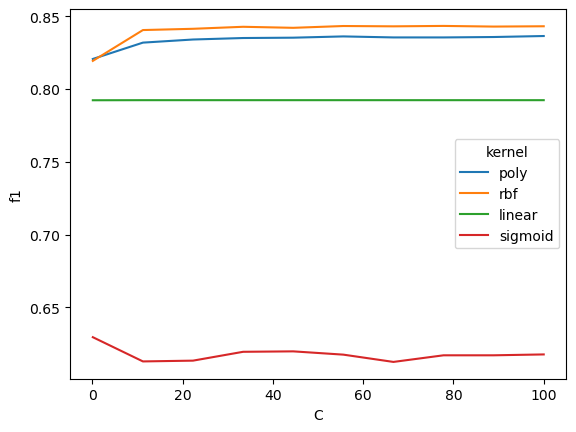

In [4]:
####### Support Vector Classification on testing data #####

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Build a SVM model
Y=Y.to_numpy()
X=X.to_numpy()

from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC

########## Select best parameters and display the results ######### 

# This section of code will always be the same, only thing that will change will be the type
base_model=SVC()
kernel_values=['poly','rbf','linear','sigmoid']
c_values=np.linspace(0.1,100,10,endpoint=True)
kf=KFold(n_splits=5,shuffle=True)
tuned_parameters=[{'C':c_values,'kernel':kernel_values}]
scores=['precision','recall','f1','roc_auc']

from sklearn.model_selection import GridSearchCV

clf=GridSearchCV(estimator=base_model,
                 param_grid=tuned_parameters,
                 scoring=scores,
                 refit='f1',
                 cv=10,
                 verbose=3)

clf.fit(X,Y) # Look at variabe in 'best_params_' for best 
#'cv_results_' calculations for each fold
print(clf.best_estimator_) #Shows the best estimator & kernel
print(clf.best_params_) # Shows the best parameters, kerel and c-value
print(clf.cv_results_['params'])

# Take the results from (clf.cv_results_['params']) and create a dataframe to store results
df_results=pd.DataFrame(clf.cv_results_['params'])
df_results['f1']=clf.cv_results_['mean_test_f1']
df_results['auc']=clf.cv_results_['mean_test_roc_auc']
df_results['precision']=clf.cv_results_['mean_test_precision']

# Visualize df_results to find best kernel algorithm and c-value
# performance of f1 score
sns.lineplot(data=df_results,x='C',y='f1',hue='kernel')

# Look at precision instead of 'f1'
#sns.lineplot(data=df_results,x='C',y='precision',hue='kernel')

##### Results:
best c = 77.8
best kernel = 'rbf'


#### Fit final model using SVC algorithm with optimized parameters found prior

In [11]:
from sklearn import svm
final_model = svm.SVC(C=77.8,kernel='rbf')
final_model.fit(X, Y)
Y_pre=final_model.predict(X)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

##### Plot Accuracy, Precision, Recall and ROC charrt of final model for training data

In [12]:
print('Accuracy:', accuracy_score(Y, Y_pre))
print('Precision:',precision_score(Y, Y_pre))
print('Recall:', recall_score(Y, Y_pre))

Accuracy: 0.8490200301529184
Precision: 0.790316838732645
Recall: 0.9519725557461407


##### ROC plot of final model using SVM algorithm with optimized parameters

##### Plot Confusion matrix of final model

Confusion Matrix [[1722  589]
 [ 112 2220]]


/Users/jprince/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


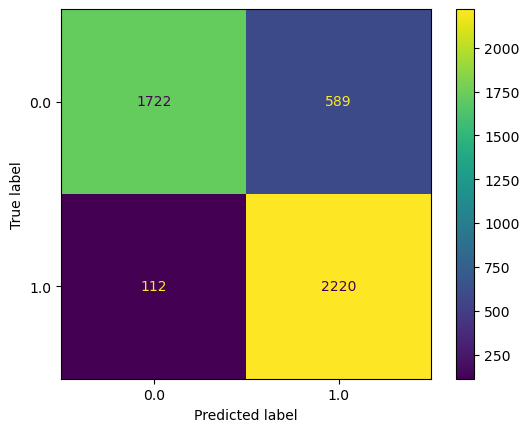

In [13]:
print('Confusion Matrix', confusion_matrix(Y, Y_pre))
plot_confusion_matrix(final_model, X, Y)